<a href="https://colab.research.google.com/github/MuhammedIrfan-tech/Data-Science-Work/blob/main/CustomerEDA%26Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Data Exploration

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [145]:
#loa the dataset
data = pd.read_csv('data.csv')

In [146]:
data.head(20)

,customer_id,age,gender,annual_income,spending_score,years_with_company,purchases_last_year,avg_purchase_value,churn
0,1,56,Female,34449.26,2,3,7,143.49,0
1,2,69,Male,59166.78,47,9,12,74.86,0
2,3,46,Male,65760.98,78,8,15,81.08,0
3,4,32,Female,59509.58,84,13,11,44.90,0
4,5,60,Male,28988.37,22,10,16,138.41,1
5,6,25,Male,58663.20,75,6,11,66.02,1
6,7,38,Female,40432.96,27,14,12,51.25,0
7,8,56,Male,70045.09,67,11,15,171.00,1
8,9,36,Male,65498.97,81,9,9,150.73,0
9,10,40,Male,45901.80,56,6,21,106.67,0


In [147]:
print(data.shape) #shape of the dataset
print(data.columns) #display column names
print(data.dtypes) #data types of each columns

(500, 9)
Index(['customer_id', 'age', 'gender', 'annual_income', 'spending_score',
       'years_with_company', 'purchases_last_year', 'avg_purchase_value',
       'churn'],
      dtype='object')
customer_id              int64
age                      int64
gender                  object
annual_income          float64
spending_score           int64
years_with_company       int64
purchases_last_year      int64
avg_purchase_value     float64
churn                    int64
dtype: object


In [148]:
# analyse missing data
print(data.isna().sum()) #null values in dataset column wise
print('duplicate customer id :',data['customer_id'].duplicated().sum()) #check any duplicate in dataset

customer_id            0
age                    0
gender                 0
annual_income          0
spending_score         0
years_with_company     0
purchases_last_year    0
avg_purchase_value     0
churn                  0
dtype: int64
duplicate customer id : 0


In [149]:
# central tendency of age
print(np.mean(data['age'])) # average of age
print(np.median(data['age'])) # median value in age column
print(np.std(data['age'])) # the standerd deviation of values from mean

44.22
45.0
15.021038579272739


In [150]:
#minimum and maximum annual income
print('Minimum income is',np.min(data['annual_income']))
print('Maximum income is',np.max(data['annual_income']))

Minimum income is 19546.7
Maximum income is 106183.21


# Distribution


In [151]:
# customers with top 10% spending_score
data[data['spending_score']>=data['spending_score'].quantile(0.10)]

,customer_id,age,gender,annual_income,spending_score,years_with_company,purchases_last_year,avg_purchase_value,churn
1,2,69,Male,59166.78,47,9,12,74.86,0
2,3,46,Male,65760.98,78,8,15,81.08,0
3,4,32,Female,59509.58,84,13,11,44.90,0
4,5,60,Male,28988.37,22,10,16,138.41,1
5,6,25,Male,58663.20,75,6,11,66.02,1
...,...,...,...,...,...,...,...,...,...
494,495,49,Female,38279.79,36,6,14,79.32,1
495,496,65,Male,27017.91,30,10,15,157.65,0
496,497,42,Female,66600.22,18,0,17,94.22,0
498,499,62,Male,44681.51,49,2,9,130.57,1


In [152]:
# customers with below-average income but above-average spending
data[(data['annual_income']<data['annual_income'].mean()) & (data['spending_score']>data['spending_score'].mean())]

,customer_id,age,gender,annual_income,spending_score,years_with_company,purchases_last_year,avg_purchase_value,churn
3,4,32,Female,59509.58,84,13,11,44.90,0
5,6,25,Male,58663.20,75,6,11,66.02,1
9,10,40,Male,45901.80,56,6,21,106.67,0
10,11,28,Female,52292.00,92,12,17,114.64,1
11,12,28,Female,44111.80,93,14,7,23.71,0
...,...,...,...,...,...,...,...,...,...
449,450,42,Female,54610.62,70,4,12,123.46,0
461,462,61,Male,47745.96,100,12,17,87.26,1
476,477,30,Female,58570.57,75,7,18,147.09,0
485,486,54,Male,49498.19,78,4,13,155.26,0


In [153]:
# Calculate churn rate overall by gender
data.groupby('gender')['churn'].sum()

,churn
gender,
Female,62
Male,68


# Realtionshp and Correlation

In [154]:
# annual_income & spending_score
np.corrcoef(data['annual_income'],data['spending_score'],)

array([[1.        , 0.03593477],
       [0.03593477, 1.        ]])

In [155]:
# years_with_company & churn
np.corrcoef(data['years_with_company'],data['churn'])

array([[ 1.        , -0.12025663],
       [-0.12025663,  1.        ]])

# Visualize The Findings

Text(0.5, 1.0, 'spending Score')

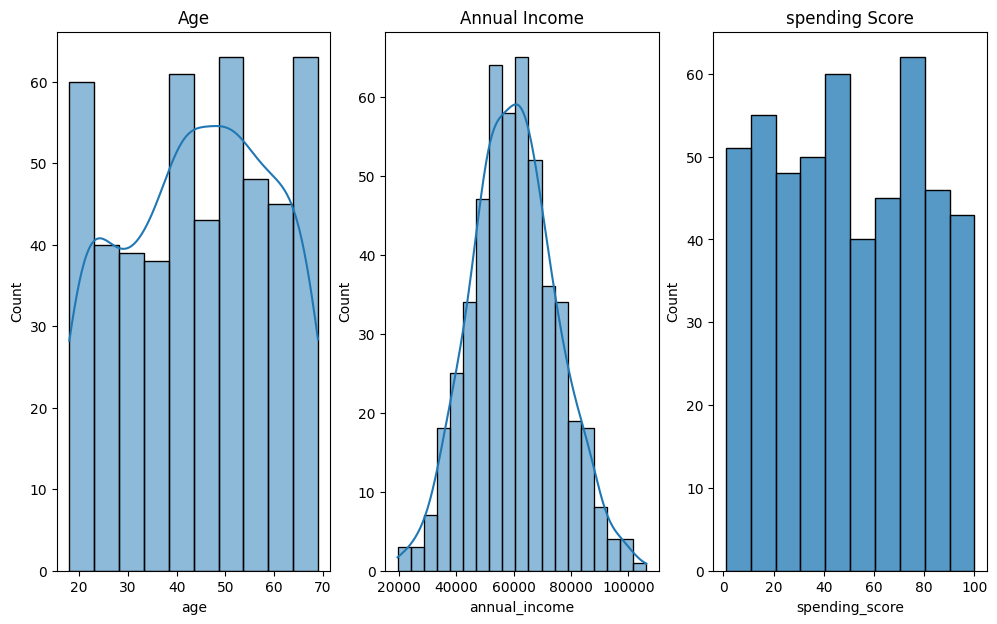

In [156]:
# analyse the distribution of data
plt.figure(figsize=(12,7))
plt.subplot(1,3,1)
plt.title('Age')
sns.histplot(data=data['age'],kde=True)
plt.subplot(1,3,2)
plt.title('Annual Income')
sns.histplot(data['annual_income'],kde=True)
plt.subplot(1, 3, 3)
sns.histplot(data['spending_score'])
plt.title('spending Score')

In [157]:
# create bar chart shows gender and churn rate
churnbygender = data.groupby('gender').agg({'churn':'sum'}).reset_index().sort_values('churn',ascending=True)

/tmp/ipython-input-2049410341.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churnbygender,x='gender',y='churn',palette='bright')


Text(0.5, 1.0, 'Churn Rate by Gender')

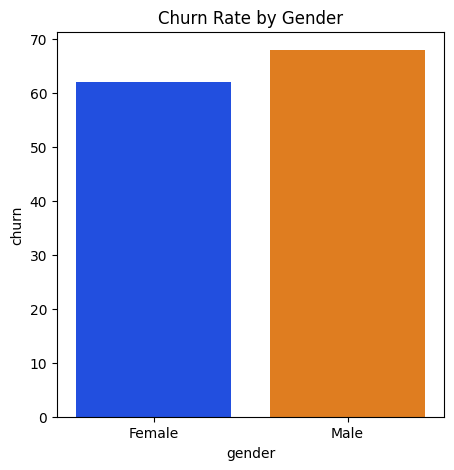

In [158]:
plt.figure(figsize=(5,5))
sns.barplot(data=churnbygender,x='gender',y='churn',palette='bright')
plt.title('Churn Rate by Gender')

Text(0.5, 1.0, 'Average Purchase Value')

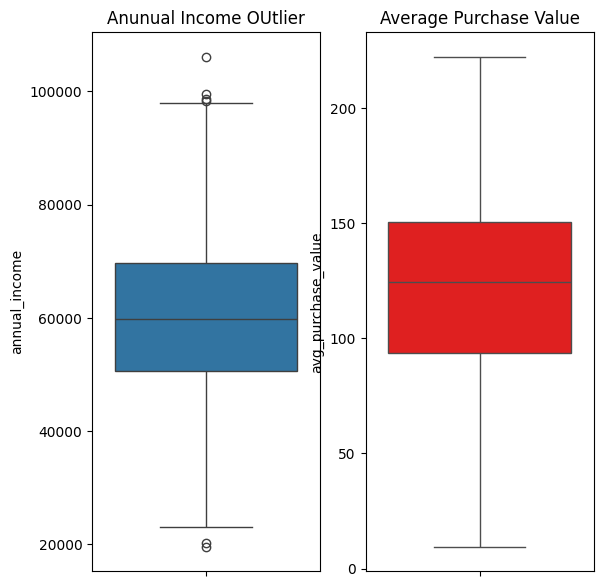

In [159]:
# box plot
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
sns.boxplot(data['annual_income'])
plt.title('Anunual Income OUtlier')
plt.subplot(1,3,2)
sns.boxplot(data['avg_purchase_value'],color='red')
plt.title('Average Purchase Value')

Text(0.5, 1.0, 'Distribution of Spending Score and Annual Income')

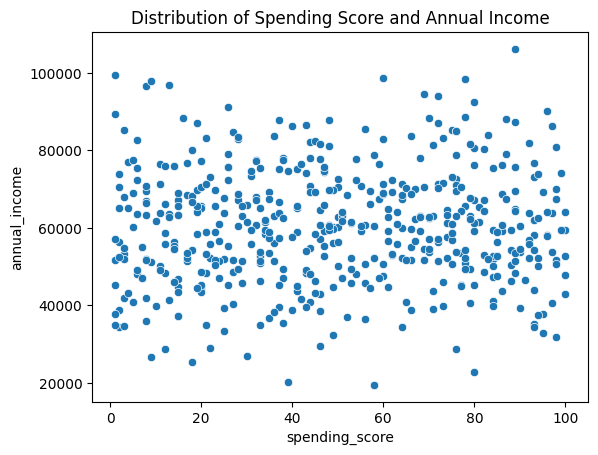

In [160]:
#create scatter plot for see pattern
sns.scatterplot(x=data['spending_score'],y=data['annual_income'])
plt.title('Distribution of Spending Score and Annual Income')

Text(0.5, 1.0, 'Correlation of Customer Data')

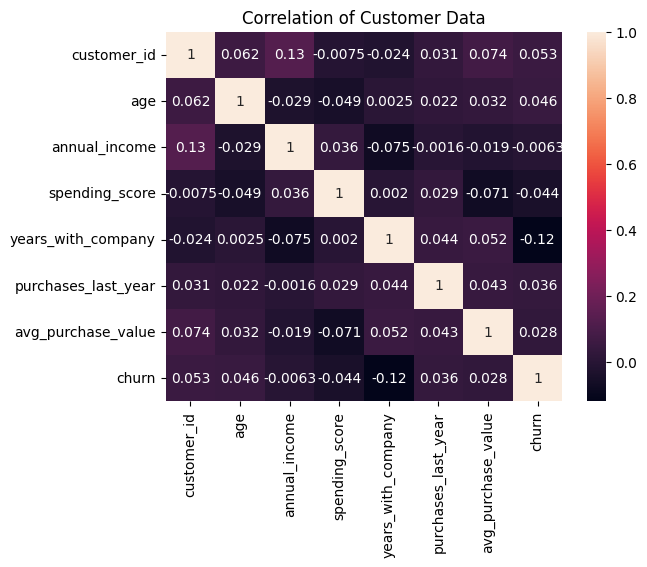

In [161]:
#display the Correlation heatmap
d=data.drop(columns='gender')
sns.heatmap(d.corr(method='pearson'),annot=True)
plt.title('Correlation of Customer Data')

# ML Model Creation

In [191]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix

In [163]:
#scale the highest ranged data
scaler = MinMaxScaler()
data['annual_income']=scaler.fit_transform(data[['annual_income']])

In [164]:
encoder = LabelEncoder()
data['gender']=encoder.fit_transform(data['gender'])

In [165]:
#split data for training and testing
x_train,x_test,y_train,y_test=train_test_split(data.drop(columns=['churn','customer_id']),data['churn'],test_size=0.80,random_state=42)

In [195]:
#load the appropriate classification model
model = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,min_samples_split=2)
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [196]:
#test the model performance
out_y=model.predict(x_test)

In [197]:
#use metrics to understand performace
print('accuracy is',accuracy_score(out_y,y_test))
print('precision is',precision_score(out_y,y_test))


accuracy is 0.645
precision is 0.19626168224299065


In [198]:
confusion_matrix(out_y,y_test)

array([[237,  86],
       [ 56,  21]])

In [199]:
pd.DataFrame(classification_report(out_y,y_test,output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.808874,0.196262,0.645,0.502568,0.690946
recall,0.733746,0.272727,0.645,0.503237,0.645000
f1-score,0.769481,0.228261,0.645,0.498871,0.665296
support,323.000000,77.000000,0.645,400.000000,400.000000
